In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import maup
from zipfile import ZipFile
import numpy as np
import os
import shutil

# US President

## Final File - Load

In [4]:
pwd

'/Users/lilyfalk/sandbox/pdv-va'

In [5]:
final = gpd.read_file('./vest_va_2016/va_2016/va_2016_president.shp')
final

,COUNTYFP,LOCALITY,VTDST,PRECINCT,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,geometry
0,001,Accomack County,000101,Chincoteague,502,1285,31,12,8,6,"POLYGON Z ((-75.42507 37.89957 0.00000, -75.42..."
1,001,Accomack County,000201,Atlantic,198,598,15,8,1,1,"POLYGON Z ((-75.59978 37.87664 0.00000, -75.59..."
2,001,Accomack County,000202,Greenbackville,342,753,19,5,8,3,"POLYGON Z ((-75.49919 37.93416 0.00000, -75.49..."
3,001,Accomack County,000301,New Church,808,640,24,5,3,6,"POLYGON Z ((-75.64987 37.92702 0.00000, -75.64..."
4,001,Accomack County,000401,Bloxom,160,370,10,4,1,0,"POLYGON Z ((-75.71556 37.87513 0.00000, -75.71..."
...,...,...,...,...,...,...,...,...,...,...,...
2451,153,Prince William County,000302,Potomac,2382,512,54,32,16,25,"POLYGON Z ((-77.32258 38.58021 0.00000, -77.32..."
2452,179,Stafford County,000302,WIDEWATER,1562,1248,103,33,18,20,"POLYGON Z ((-77.39428 38.47458 0.00000, -77.39..."
2453,179,Stafford County,000401,AQUIA,555,303,24,14,6,6,"POLYGON Z ((-77.39221 38.48583 0.00000, -77.39..."
2454,195,Wise County,000302,East Stone Gap,297,1555,22,16,9,10,"POLYGON Z ((-82.80429 36.83206 0.00000, -82.80..."


# Election Results: US President

## Read in election results

In [6]:
df = pd.read_csv('./vest_va_2016/Virginia_Elections_Database__2016_President_General_Election_including_precincts.csv')

In [7]:
df.head()

,County/City,Ward,Pct,Hillary R. Clinton,Donald J. Trump,Gary Johnson,Evan McMullin,Jill Stein,All Others,Total Votes Cast
0,NaN,NaN,NaN,Democratic,Republican,Libertarian,Independent,Green,NaN,NaN
1,Accomack County,-,101 - Chincoteague,444,"1,188",26,10,7,5,"1,680"
2,Accomack County,-,201 - Atlantic,175,553,13,7,1,1,750
3,Accomack County,-,202 - Greenbackville,302,697,17,4,7,3,"1,030"
4,Accomack County,-,301 - New Church,713,592,21,4,3,5,"1,338"


In [8]:
df['LOCALITY'] = df['County/City']
df['G16PREDCLI'] = df['Hillary R. Clinton']
df['G16PRERTRU'] = df['Donald J. Trump']
df['G16PRELJOH'] = df['Gary Johnson'] 
df['G16PREIMCM'] = df['Evan McMullin']
df['G16PREGSTE'] = df['Jill Stein']
df['G16PREOWRI'] = df['All Others']
df = df.iloc[1:]
df = df.drop(['County/City', 'Hillary R. Clinton', 'Donald J. Trump', 'Gary Johnson', 'Evan McMullin', 'Jill Stein', 'Ward',  'All Others', 'Total Votes Cast'], axis = 1)

df = df.fillna(value = 0)
county_dict = pd.Series(final['COUNTYFP'].values, index = final['LOCALITY']).to_dict()
df['COUNTYFP'] = df['LOCALITY'].map(county_dict)

df['G16PREDCLI'] = df['G16PREDCLI'].map(lambda x: str(x).replace(',', ''))
df['G16PRERTRU'] = df['G16PRERTRU'].map(lambda x: str(x).replace(',', ''))
df['G16PRELJOH'] = df['G16PRELJOH'].map(lambda x: str(x).replace(',', ''))
df['G16PREIMCM'] = df['G16PREIMCM'].map(lambda x: str(x).replace(',', ''))
df['G16PREGSTE'] = df['G16PREGSTE'].map(lambda x: str(x).replace(',', ''))
df['G16PREOWRI'] = df['G16PREOWRI'].map(lambda x: str(x).replace(',', ''))

df['G16PREDCLI'] = df['G16PREDCLI'].astype(str).astype(float).astype(int)
df['G16PRERTRU'] = df['G16PRERTRU'].astype(str).astype(float).astype(int)
df['G16PRELJOH'] = df['G16PRELJOH'].astype(str).astype(float).astype(int)
df['G16PREIMCM'] = df['G16PREIMCM'].astype(str).astype(float).astype(int)
df['G16PREGSTE'] = df['G16PREGSTE'].astype(str).astype(float).astype(int)
df['G16PREOWRI'] = df['G16PREOWRI'].astype(str).astype(float).astype(int)

df.head()

,Pct,LOCALITY,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,COUNTYFP
1,101 - Chincoteague,Accomack County,444,1188,26,10,7,5,001
2,201 - Atlantic,Accomack County,175,553,13,7,1,1,001
3,202 - Greenbackville,Accomack County,302,697,17,4,7,3,001
4,301 - New Church,Accomack County,713,592,21,4,3,5,001
5,401 - Bloxom,Accomack County,141,342,9,3,1,0,001


## Re allocate absentee votes

### explore data

In [9]:
df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) & (df['Pct'].map(lambda x: 'CD' in str(x)))] #| (df['Pct'].map(lambda x: 'Provisional' in str(x)))]

,Pct,LOCALITY,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,COUNTYFP
244,Ab - Central Absentee Precinct (CD 5),Bedford County,649,1246,43,22,7,13,019
245,Ab - Central Absentee Precinct (CD 6),Bedford County,556,1058,65,38,6,19,019
467,AB - Central Absentee Precinct (CD 3),Chesapeake City,4171,1847,120,51,32,35,550
468,Ab - Central Absentee Precinct (CD 4),Chesapeake City,4233,4316,257,79,33,52,550
546,Ab - Central Absentee Precinct (CD 4),Chesterfield County,2880,2952,139,50,11,38,041
547,Ab - Central Absentee Precinct (CD 7),Chesterfield County,6138,4997,465,150,51,104,041
910,Ab - Central Absentee Precinct (CD 10),Fairfax County,17488,8233,809,428,136,455,059
911,Ab - Central Absentee Precinct (CD 11),Fairfax County,40351,13165,1487,890,351,735,059
912,Ab - Central Absentee Precinct (CD 8),Fairfax County,26158,7795,869,562,239,509,059
949,Ab - Central Absentee Precinct (CD 1),Fauquier County,210,324,22,12,10,6,061


In [10]:
df[(df['Pct'].map(lambda x: 'Provisional' in str(x))) & (df['Pct'].map(lambda x: 'CD' in str(x)))] #| (df['Pct'].map(lambda x: 'Provisional' in str(x)))]

,Pct,LOCALITY,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,COUNTYFP
246,Provisional (CD 5),Bedford County,5,9,0,1,0,0,019
247,Provisional (CD 6),Bedford County,4,6,0,0,0,0,019
469,Provisional (CD 3),Chesapeake City,23,14,2,1,1,0,550
470,Provisional (CD 4),Chesapeake City,41,41,3,1,1,0,550
548,Provisional (CD 4),Chesterfield County,29,26,0,0,0,1,041
549,Provisional (CD 7),Chesterfield County,49,38,6,1,1,0,041
913,Provisional (CD 10),Fairfax County,72,38,8,0,0,3,059
914,Provisional (CD 11),Fairfax County,201,90,16,6,5,3,059
915,Provisional (CD 8),Fairfax County,187,55,11,11,0,2,059
951,Provisional (CD 1),Fauquier County,1,4,0,0,0,0,061


See that for county where Abs or Prov has cd on end, so do other precinct names
so, create list of the precincts that have cd necessary
then assign new county name based on that ID

In [11]:
cd_abs_prov_prec = df[((df['Pct'].map(lambda x: 'Absentee' in str(x))) &(df['Pct'].map(lambda x: 'CD' in str(x)))) | ((df['Pct'].map(lambda x: 'Provisional' in str(x))) & (df['Pct'].map(lambda x: 'CD' in str(x))))]

In [12]:
county_with_cd_nec_list = list(cd_abs_prov_prec['COUNTYFP'])

In [13]:
df['Pct'].str.slice(start = -5)[df['COUNTYFP'].isin(county_with_cd_nec_list)].value_counts()

CD 4)    177
CD 3)    164
D 11)    158
CD 7)    151
CD 8)     82
D 10)     69
CD 1)     61
CD 5)     48
CD 6)     38
CD 9)     33
CD 2)     30
Name: Pct, dtype: int64

In [14]:
#cd_abs_prov_prec['cd_countyfp'] = 
cd_abs_prov_prec['COUNTYFP'] + '-' + cd_abs_prov_prec['Pct'].str.slice(start = -5, stop = -1)

244     019-CD 5
245     019-CD 6
246     019-CD 5
247     019-CD 6
467     550-CD 3
          ...   
2425    177-CD 7
2494    800-CD 3
2495    800-CD 4
2496    800-CD 3
2497    800-CD 4
Length: 62, dtype: object

In [15]:
def add_cd_to_county(county_list, precinct, countyfp):
    if (countyfp in county_list):
        countyfp_cd = countyfp + '-' + precinct[-5:-1]
        return countyfp_cd
    else:
        countyfp_cd = countyfp
        return countyfp_cd

In [16]:
df['countyfp_cd'] = df.apply(lambda row: add_cd_to_county(county_with_cd_nec_list, row['Pct'], row['COUNTYFP']), axis = 1)

In [17]:
df[df['COUNTYFP'].isin(county_with_cd_nec_list)]

,Pct,LOCALITY,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,COUNTYFP,countyfp_cd
213,101 - Goodview Elem School (CD 5),Bedford County,310,1366,42,17,3,11,019,019-CD 5
214,102 - Hardy Vol Fire Co (CD 5),Bedford County,163,553,14,9,1,6,019,019-CD 5
215,103 - Chamblissburg Baptist Church (CD 5),Bedford County,263,942,45,8,5,5,019,019-CD 5
216,104 - Stewartsville Rescue Squad (CD 5),Bedford County,222,864,26,7,5,3,019,019-CD 5
217,201 - Bedford Christian Church (CD 5),Bedford County,155,454,19,9,4,5,019,019-CD 5
...,...,...,...,...,...,...,...,...,...,...
2493,706 - Huntersville (CD 3),Suffolk City,1488,271,26,13,20,15,800,800-CD 3
2494,AB - Central Absentee Precinct (CD 3),Suffolk City,2252,1151,69,22,15,25,800,800-CD 3
2495,Ab - Central Absentee Precinct (CD 4),Suffolk City,1365,568,28,6,3,2,800,800-CD 4
2496,Provisional (CD 3),Suffolk City,24,16,0,3,1,0,800,800-CD 3


In [18]:
df.countyfp_cd.value_counts()

059-D 11    117
810         100
107          95
059-CD 8     82
087-CD 7     69
           ... 
610           5
830           4
530           3
678           3
720           2
Name: countyfp_cd, Length: 148, dtype: int64

In [19]:
len(county_with_cd_nec_list)

62

In [20]:
df[df['COUNTYFP'] == '800']

,Pct,LOCALITY,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,COUNTYFP,countyfp_cd
2462,101 - Belleharbour (CD 3),Suffolk City,768,344,45,14,11,6,800,800-CD 3
2463,102 - Driver (CD 3),Suffolk City,886,1735,85,49,14,17,800,800-CD 3
2464,104 - Bennetts Creek (CD 3),Suffolk City,817,841,66,32,22,14,800,800-CD 3
2465,201 - Ebenezer (CD 3),Suffolk City,400,917,34,21,7,4,800,800-CD 3
2466,202 - Chuckatuck (CD 3),Suffolk City,507,821,40,10,8,6,800,800-CD 3
2467,203 - Kings Fork (CD 3),Suffolk City,1129,695,55,16,11,7,800,800-CD 3
2468,204 - Hillpoint (CD 3),Suffolk City,893,562,40,21,6,4,800,800-CD 3
2469,301 - White Marsh (CD 4),Suffolk City,333,174,5,5,1,0,800,800-CD 4
2470,302 - John F Kennedy (CD 3),Suffolk City,613,198,17,2,3,3,800,800-CD 3
2471,302 - John F Kennedy (CD 4),Suffolk City,886,22,6,3,4,2,800,800-CD 4


In [21]:
df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]

,Pct,LOCALITY,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,COUNTYFP,countyfp_cd
17,Ab - Central Absentee Precinct,Accomack County,784,644,32,16,8,3,001,001
18,Provisional,Accomack County,3,1,2,0,0,0,001,001
47,Ab - Central Absentee Precinct,Albemarle County,4707,1828,238,120,39,61,003,003
48,Provisional,Albemarle County,48,29,5,2,2,1,003,003
76,Ab - Central Absentee Precinct,Alexandria City,15677,3069,484,251,138,321,510,510
...,...,...,...,...,...,...,...,...,...,...
2720,Provisional,Wise County,0,3,0,0,0,0,195,195
2732,Ab - Central Absentee Precinct,Wythe County,276,574,23,8,3,12,197,197
2733,Provisional,Wythe County,6,2,0,0,0,0,197,197
2747,Ab - Central Absentee Precinct,York County,1657,1712,150,71,16,38,199,199


### Real reallocation

In [22]:
def get_absentee_frac(prec_tot, county_tot, absentee_tot):
    '''
    Keyword arguments: (put inputs to funtions and say what they should be)
    precinct vote total for given candidate (int)
    county vote total for given candidate, absentee and provisional votes not included (int)
    absentee vote total for county for given candidate (int)
    '''
    if county_tot != 0:
        prec_frac = prec_tot/county_tot
        absentee_frac = prec_frac*absentee_tot
    else:
        absentee_frac = 0
    return absentee_frac

In [23]:
absentee_and_prov = df[(df['Pct'].map(lambda x: 'Absentee' in str(x))) | (df['Pct'].map(lambda x: 'Provisional' in str(x)))]
groupby_absentee_and_prov_tot = absentee_and_prov.groupby(['countyfp_cd']).sum()
groupby_absentee_and_prov_tot

,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI
countyfp_cd,,,,,,
001,787,645,34,16,8,3
003,4755,1857,243,122,41,62
005,204,332,10,2,4,0
007,293,515,14,7,0,3
009,519,654,20,12,7,10
...,...,...,...,...,...,...
800-CD 4,1366,570,28,6,3,2
810,14298,14090,966,268,172,251
820,333,344,26,3,1,7


In [24]:
groupby_county_df_tot = df.groupby(['countyfp_cd']).sum()
df_no_absent_or_provisional = df[(df['Pct'].map(lambda x: 'Absentee' not in str(x))) & (df['Pct'].map(lambda x: 'Provisional' not in str(x)))
                                & (df['LOCALITY'] != 'TOTALS')]
groupby_county_tot_no_absentee = df_no_absent_or_provisional.groupby('countyfp_cd').sum()

In [25]:
df_with_absentee_reallocated = df_no_absent_or_provisional.copy()
sum_allocated = 0
prec_sum_w_ab = 0
for index, precinct_total_row_by_candidate in df_no_absent_or_provisional.iterrows():
    #print(precinct_total_row_by_candidate)
    county_fips = precinct_total_row_by_candidate['countyfp_cd']
    county_total_row_by_candidate_no_absentee = groupby_county_tot_no_absentee.loc[county_fips]
    county_absentee_and_provisional_by_candidate = groupby_absentee_and_prov_tot.loc[county_fips]
    #print(precinct_total_row_by_candidate, county_total_row_by_candidate_no_absentee, county_absentee_and_provisional_by_candidate)
    for candidate, votes in county_total_row_by_candidate_no_absentee.to_dict().items():
        prec_tot = precinct_total_row_by_candidate[candidate]
        #print('precinct total: ', prec_tot)
        county_tot = votes
        #print('county total: ', county_tot)
        absentee_tot = county_absentee_and_provisional_by_candidate[candidate]
        #print('absentee total: ', absentee_tot)
        absentee_frac = get_absentee_frac(prec_tot, county_tot, absentee_tot)
        #print('absentee votes to allocate to precinct: ', absentee_frac)
        prec_with_absentee_allocation = prec_tot + absentee_frac
        #print('new precinct total: ', prec_with_absentee_allocation)
        df_with_absentee_reallocated.loc[index, candidate] = round(prec_with_absentee_allocation) #index is row, candidate is column
print(prec_sum_w_ab)
df_with_absentee_reallocated.loc[index, candidate]
#df_with_absentee_reallocated.loc[index, candidate]

0


37.0

In [26]:
groupby_df_with_absentee_reallocated = df_with_absentee_reallocated.groupby('COUNTYFP').sum()

In [27]:
groupby_county_final = final.groupby(['COUNTYFP']).sum()

In [28]:
df_absentee_reallocate_with_final = pd.merge(groupby_df_with_absentee_reallocated, groupby_county_final, on = 'COUNTYFP', how = 'inner', suffixes = ('_x', '_y'))

In [29]:
df_absentee_reallocate_with_final

,G16PREDCLI_x,G16PRERTRU_x,G16PRELJOH_x,G16PREIMCM_x,G16PREGSTE_x,G16PREOWRI_x,G16PREDCLI_y,G16PRERTRU_y,G16PRELJOH_y,G16PREIMCM_y,G16PREGSTE_y,G16PREOWRI_y
COUNTYFP,,,,,,,,,,,,
001,6741.0,8584.0,263.0,114.0,66.0,51.0,6740,8583,264,112,66,53
003,33344.0,19257.0,2105.0,1058.0,449.0,510.0,33345,19259,2105,1059,450,508
005,2166.0,4873.0,164.0,67.0,34.0,17.0,2166,4874,164,69,35,17
007,2127.0,4708.0,130.0,41.0,11.0,23.0,2128,4708,129,41,11,23
009,5057.0,9718.0,317.0,159.0,65.0,78.0,5057,9719,317,159,65,79
...,...,...,...,...,...,...,...,...,...,...,...,...
800,23280.0,18008.0,1100.0,433.0,221.0,194.0,23280,18006,1098,436,223,197
810,91034.0,98222.0,8254.0,2234.0,1735.0,1769.0,91032,98224,8255,2237,1737,1777
820,3765.0,4801.0,336.0,145.0,73.0,84.0,3764,4801,336,145,74,84


In [30]:
df_with_absentee_reallocated.columns

Index(['Pct', 'LOCALITY', 'G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH',
       'G16PREIMCM', 'G16PREGSTE', 'G16PREOWRI', 'COUNTYFP', 'countyfp_cd'],
      dtype='object')

In [31]:
column_list = ['G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH',
       'G16PREIMCM', 'G16PREGSTE', 'G16PREOWRI']

In [32]:
def sum_checker(df, column_list):
    list_max = 0
    for i in column_list:
        left_sum = df[i+'_x'].sum()
        right_sum = df[i+'_y'].sum()
        if (left_sum == right_sum):
            print('column: ', i, ' have the same sums')
        
        else:
            diff = abs(left_sum - right_sum)
            percent = abs(left_sum - right_sum)/left_sum
            print('column: ', i)
            print('RDH sum is ', str(left_sum))
            print('Partner sum is ', str(right_sum))
            print('their (absolute) difference is ', str(diff))
            print('As a percentage of DF1 this is ', str(round(percent*100,5)) + '%')
            if (percent>list_max):
                list_max = percent
            print('')
    print('The max difference (as a percent of the total of on DF column is: ', str(round(list_max,5)))

In [33]:
sum_checker(df_absentee_reallocate_with_final, column_list)

column:  G16PREDCLI
RDH sum is  1981474.0
Partner sum is  1981473
their (absolute) difference is  1.0
As a percentage of DF1 this is  5e-05%

column:  G16PRERTRU
RDH sum is  1769430.0
Partner sum is  1769443
their (absolute) difference is  13.0
As a percentage of DF1 this is  0.00073%

column:  G16PRELJOH
RDH sum is  118279.0
Partner sum is  118274
their (absolute) difference is  5.0
As a percentage of DF1 this is  0.00423%

column:  G16PREIMCM
RDH sum is  54005.0
Partner sum is  54054
their (absolute) difference is  49.0
As a percentage of DF1 this is  0.09073%

column:  G16PREGSTE
RDH sum is  27565.0
Partner sum is  27638
their (absolute) difference is  73.0
As a percentage of DF1 this is  0.26483%

column:  G16PREOWRI
RDH sum is  33714.0
Partner sum is  33749
their (absolute) difference is  35.0
As a percentage of DF1 this is  0.10381%

The max difference (as a percent of the total of on DF column is:  0.00265


**After changing county names with cd** the results are better, but not all the way... groupby and join after the reallocate it should not matter since it is the county totals...

## Unique Identifier

In [34]:
(df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['Pct'].str.slice(stop = 3)).nunique()

2434

In [35]:
df_with_absentee_reallocated.shape[0]

2459

In [36]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated.Pct.str.slice(stop = 3)

In [37]:
def vtdst_changer(vtdst):
    if (vtdst[1:3] == ' -'):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[1:3] == '- '):
        two_lead_zero = '00' + vtdst[:1]
        return two_lead_zero
    elif (vtdst[-1:] == ' '):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    elif (vtdst[-1:] == '-'):
        one_lead_zero = '0' + vtdst[:2]
        return one_lead_zero
    else:
        return vtdst

In [38]:
df_with_absentee_reallocated['vtdst'] = df_with_absentee_reallocated['vtdst'].apply(vtdst_changer)
df_with_absentee_reallocated['unique_id'] = df_with_absentee_reallocated['COUNTYFP'] + df_with_absentee_reallocated['vtdst']

In [39]:
final['unique_id'] = final['COUNTYFP'] + final['VTDST'].str.slice(start = 3)

In [40]:
set(final['unique_id']) - set(df_with_absentee_reallocated['unique_id'])

{'059700'}

In [41]:
set(df_with_absentee_reallocated['unique_id']) - set(final['unique_id'])

set()

In [42]:
double_in_df = df_with_absentee_reallocated['unique_id'].value_counts()
df_double_list = double_in_df[double_in_df > 1].index
double_in_final = final['unique_id'].value_counts()
final_double_list = double_in_final[double_in_final > 1].index
print(set(final_double_list) - set(df_double_list))
print(set(df_double_list) - set(final_double_list))

set()
{'800403', '550045', '059925', '550019'}


In [43]:
len(final_double_list)

21

In [44]:
len(df_double_list)

25

In [46]:
def vtdst_add_cd(unique_id, precinct, double_list):
    if (unique_id in double_list):
        unique_id = unique_id + precinct[-6:]
        return unique_id
    else:
        return unique_id

In [47]:
df_with_absentee_reallocated['unique_id_1'] = df_with_absentee_reallocated.apply(lambda row: vtdst_add_cd(row['unique_id'], row['Pct'], list(df_double_list)), axis = 1)
df_with_absentee_reallocated['unique_id_1'].nunique()

2459

In [50]:
final['unique_id'].nunique()

2435

In [53]:
final['unique_id_1'] = final.apply(lambda row: vtdst_add_cd(row['unique_id'], row['PRECINCT'], final_double_list), axis = 1)
final['unique_id_1'].nunique()

2456

In [54]:
print(set(final['unique_id_1']) - set(df_with_absentee_reallocated['unique_id_1']))
print(set(df_with_absentee_reallocated['unique_id_1']) - set(final['unique_id_1']))

{'059925', '550019', '550045', '800403', '059700'}
{'550019(CD 4)', '059925CD 11)', '550045(CD 3)', '059925CD 10)', '550019(CD 3)', '550045(CD 4)', '800403(CD 3)', '800403(CD 4)'}


# Shapefile

In [55]:
county_fips = []
for directory in os.listdir('./vest_va_2016/census_shps_by_county_all_unzip/'):
    if not directory[0] == '.':
        county_fips.append(directory[-5:])
        
proj = final.crs   

county_vtds = []
for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    vtd_ref = ref + i + '/PVS_19_v2_vtd_' + i + '.shp' 
    vtd_shp = gpd.read_file(vtd_ref)
    print(i, ' added to list')
    county_vtds.append(vtd_shp)

global shp
shp = gpd.GeoDataFrame(pd.concat(county_vtds, axis = 0) , crs = proj) 

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

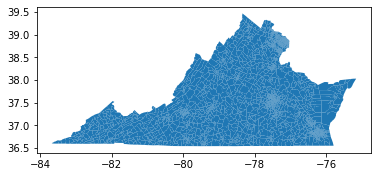

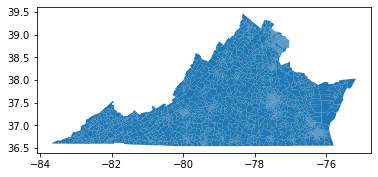

In [56]:
shp.plot()
final.plot()

In [57]:
shp.shape[0]

2462

In [60]:
shp['unique_id'] = shp['COUNTYFP'] + shp['VTDST'].str.slice(start = 3)

In [58]:
final.shape[0]

2456

In [59]:
print(len((set(shp.COUNTYFP + shp.VTDST.str.slice(start = 3)) - set(final.COUNTYFP + final.VTDST.str.slice(start = 3)))))
print(len((set(final.COUNTYFP + final.VTDST.str.slice(start = 3)) - set(shp.COUNTYFP + shp.VTDST.str.slice(start = 3)))))

50
24


In [61]:
shp['unique_id'].nunique()

2461

In [62]:
#Dictionary based on comparison in Excel sheet + plotting unique ids to observe match or not
overlay_w_shp_to_df_mod_dict = {
    '059925': '059925',
    '077011': '077401',
    '077012': '077401',
    '095041': '095104',
    '095042': '095104',
    '107422': '107419',
    '153061': '153106',
    '191021': '191702',
    '191022': '191702',
    '520041':  '520004',
    '520042':  '520004',
    '550019': '550019',
    '550045': '550045',
    '685031': '685003',
    '685032': '685003',
    '800403': '800403'
}

In [63]:
set(overlay_w_shp_to_df_mod_dict.values()) - (set(final['unique_id']) - set(shp['unique_id']) )

{'059925', '550019', '550045', '800403'}

In [64]:
set(overlay_w_shp_to_df_mod_dict.keys()) - (set(shp['unique_id']) - set(final['unique_id']))

{'059925', '550019', '550045', '800403'}

In [65]:
set(df_with_absentee_reallocated['unique_id_1']) - set(final['unique_id_1'])

{'059925CD 10)',
 '059925CD 11)',
 '550019(CD 3)',
 '550019(CD 4)',
 '550045(CD 3)',
 '550045(CD 4)',
 '800403(CD 3)',
 '800403(CD 4)'}

In [66]:
set(final['unique_id_1']) - set(df_with_absentee_reallocated['unique_id_1'])

{'059700', '059925', '550019', '550045', '800403'}

### Merge in df to match final

In [67]:
merge_in_df_match_final = {'059925CD 10)': '059925',
 '059925CD 11)': '059925',
 '550019(CD 3)': '550019',
 '550019(CD 4)': '550019',
 '550045(CD 3)': '550045',
 '550045(CD 4)': '550045',
 '800403(CD 3)': '800403',
 '800403(CD 4)': '800403'}

In [68]:
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(merge_in_df_match_final.keys()), 'unique_id_1'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(merge_in_df_match_final.keys()), 'unique_id_1'].map(merge_in_df_match_final)

In [69]:
print(set(df_with_absentee_reallocated['unique_id_1']) - set(final['unique_id_1']))
print(set(final['unique_id_1']) - set(df_with_absentee_reallocated['unique_id_1']))

set()
{'059700'}


In [70]:
df_with_absentee_reallocated['unique_id_1'].nunique()

2455

### Check value counts in unique_id_1 column to sum election results into merge

In [71]:
double_in_df_1 = df_with_absentee_reallocated['unique_id_1'].value_counts()
df_double_list_1 = double_in_df_1[double_in_df_1 > 1].index
df_with_absentee_reallocated[df_with_absentee_reallocated['unique_id_1'].isin(df_double_list_1)]

,Pct,LOCALITY,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1
419,19 - Jolliff (CD 3),Chesapeake City,0.0,0.0,0.0,0.0,0.0,0.0,550,550-CD 3,019,550019,550019
420,19 - Jolliff (CD 4),Chesapeake City,434.0,904.0,54.0,19.0,6.0,8.0,550,550-CD 4,019,550019,550019
447,45 - Sunray Ii (CD 3),Chesapeake City,0.0,0.0,0.0,0.0,0.0,0.0,550,550-CD 3,045,550045,550045
448,45 - Sunray II (CD 4),Chesapeake City,436.0,240.0,17.0,6.0,6.0,3.0,550,550-CD 4,045,550045,550045
900,925 - Old Mill (CD 10),Fairfax County,1005.0,559.0,69.0,25.0,15.0,13.0,059,059-D 10,925,059925,059925
901,925 - Old Mill (CD 11),Fairfax County,0.0,0.0,0.0,0.0,0.0,0.0,059,059-D 11,925,059925,059925
2476,403 - Southside (CD 3),Suffolk City,0.0,0.0,0.0,0.0,0.0,0.0,800,800-CD 3,403,800403,800403
2477,403 - Southside (CD 4),Suffolk City,870.0,47.0,2.0,4.0,2.0,2.0,800,800-CD 4,403,800403,800403


In [72]:
#remove rows with zero votes
df_remove_list = ['19 - Jolliff (CD 3)', '45 - Sunray Ii (CD 3)', '925 - Old Mill (CD 11)', '403 - Southside (CD 3)']
df_with_absentee_reallocated[df_with_absentee_reallocated['Pct'].isin(df_remove_list)]

,Pct,LOCALITY,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,COUNTYFP,countyfp_cd,vtdst,unique_id,unique_id_1
419,19 - Jolliff (CD 3),Chesapeake City,0.0,0.0,0.0,0.0,0.0,0.0,550,550-CD 3,019,550019,550019
447,45 - Sunray Ii (CD 3),Chesapeake City,0.0,0.0,0.0,0.0,0.0,0.0,550,550-CD 3,045,550045,550045
901,925 - Old Mill (CD 11),Fairfax County,0.0,0.0,0.0,0.0,0.0,0.0,059,059-D 11,925,059925,059925
2476,403 - Southside (CD 3),Suffolk City,0.0,0.0,0.0,0.0,0.0,0.0,800,800-CD 3,403,800403,800403


In [73]:
df_with_absentee_reallocated = df_with_absentee_reallocated[~df_with_absentee_reallocated['Pct'].isin(df_remove_list)]

In [74]:
df_with_absentee_reallocated.shape

(2455, 13)

### Now that df and final match up, want to match up df/vest and raw shp

In [75]:
len(set(df_with_absentee_reallocated['unique_id_1']) - set(shp['unique_id']))

66

In [76]:
len(set(shp['unique_id']) - set(df_with_absentee_reallocated['unique_id_1']))

72

In [78]:
tidy_cd_id_format_dict = {
 '059513CD 11)': '059513(CD 11)',
 '153110CD 10)': '153110(CD 10)',
 '153112CD 10)': '153112(CD 10)',
 '153210CD 11)': '153210(CD 11)',
 '153312CD 11)': '153312(CD 11)',
 '153609CD 11)': '153609(CD 11)',
}

In [79]:
df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(tidy_cd_id_format_dict.keys()), 'unique_id_1'] = df_with_absentee_reallocated.loc[df_with_absentee_reallocated['unique_id_1'].isin(tidy_cd_id_format_dict.keys()), 'unique_id_1'].map(tidy_cd_id_format_dict)
final.loc[final['unique_id_1'].isin(tidy_cd_id_format_dict.keys()), 'unique_id_1'] = final.loc[final['unique_id_1'].isin(tidy_cd_id_format_dict.keys()), 'unique_id_1'].map(tidy_cd_id_format_dict)

In [80]:
set(final['unique_id_1']) - set(df_with_absentee_reallocated['unique_id_1'])

{'059700'}

In [81]:
final[final['unique_id_1'] == '059700']

,COUNTYFP,LOCALITY,VTDST,PRECINCT,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,geometry,unique_id,unique_id_1
584,059,Fairfax County,000700,Fairfax Court,0,0,0,0,0,0,"POLYGON Z ((-77.31648 38.84615 0.00000, -77.31...",059700,059700


### Now that id format tidied, load in CD in shp to create matching unique id

#### **Load in cd shp to enable splits later on**

In [84]:
county_cd = []

for i in county_fips: #i dont have fips_codes file
    ref = './vest_va_2016/census_shps_by_county_all_unzip/partnership_shapefiles_19v2_'
    cd_ref = ref + i + '/PVS_19_v2_cd_' + i + '.shp' 
    cd_shp = gpd.read_file(cd_ref)
    print(i, ' added to list')
    county_cd.append(cd_shp)
global cd
cd = gpd.GeoDataFrame(pd.concat(county_cd, axis = 0) , crs = proj) 

51580  added to list
51117  added to list
51121  added to list
51119  added to list
51770  added to list
51181  added to list
51175  added to list
51143  added to list
51520  added to list
51127  added to list
51740  added to list
51111  added to list
51145  added to list
51510  added to list
51187  added to list
51173  added to list
51001  added to list
51650  added to list
51037  added to list
51063  added to list
51097  added to list
51099  added to list
51009  added to list
51660  added to list
51036  added to list
51031  added to list
51007  added to list
51053  added to list
51065  added to list
51091  added to list
51047  added to list
51071  added to list
51085  added to list
51049  added to list
51620  added to list
51680  added to list
51025  added to list
51013  added to list
51810  added to list
51077  added to list
51083  added to list
51079  added to list
51610  added to list
51041  added to list
51015  added to list
51023  added to list
51820  added to list
51169  added 

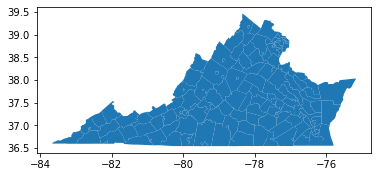

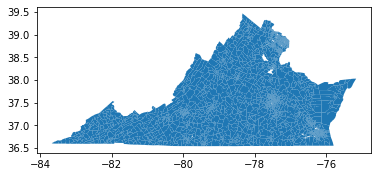

In [85]:
cd.plot()
overlay = gpd.overlay(cd, shp, how = 'union', make_valid = True, keep_geom_type = True)
overlay.plot()

In [137]:
overlay_w_shp = gpd.GeoDataFrame(pd.merge(overlay, shp, on = 'unique_id', how = 'outer'), crs = proj)
overlay_w_shp.shape

<ipython-input-137-7a853ff08c61>:1: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  overlay_w_shp = gpd.GeoDataFrame(pd.merge(overlay, shp, on = 'unique_id', how = 'outer'), crs = proj)


(2469, 59)

In [138]:
overlay_w_shp['unique_id_1'] = overlay_w_shp['unique_id'] + '(CD ' +overlay_w_shp['CDFP'].str.lstrip('0') + ')'

In [139]:
len(df_double_list)

25

In [140]:
overlay_w_shp.loc[~overlay_w_shp['unique_id'].isin(df_double_list), 'unique_id_1'] = overlay_w_shp.loc[~overlay_w_shp['unique_id'].isin(df_double_list), 'unique_id']

### See how well id matches up to df

In [141]:
len(set(overlay_w_shp['unique_id_1']) - set(df_with_absentee_reallocated['unique_id_1']))

57

In [142]:
len(set(df_with_absentee_reallocated['unique_id_1']) - set(overlay_w_shp['unique_id_1']))

56

In [206]:
list(overlay_w_shp['NAME'][overlay_w_shp.unique_id_1.isin(set(overlay_w_shp['unique_id_1']) - set(df_with_absentee_reallocated['unique_id_1']))])

['Biscuit Run',
 'Pantops',
 'Mechums River',
 'Met Park',
 'Garfield Park',
 'Forest Fire Station #2',
 'OAKLAND',
 'Iron Bridge North',
 'Ridgedale',
 'LongHouse',
 'Magnolia',
 'Clover Hill',
 'Army',
 'Fairfax Court',
 'Gallows East',
 'Berkeley D Part 2',
 'Goshen Post',
 'JOHN CHAMPE',
 'STONE HILL',
 'BRAMBLETON MIDDLE',
 'Buffalo trail',
 'B-3 part 2',
 'Westgate Part 2',
 'Piney Branch',
 'Penn',
 'Williams',
 'South Lindenwood',
 'East Bridgewater',
 'Potomac Yard',
 'Alex Renew',
 'Olympus Condo',
 'Deep Creek II',
 'Waterway II',
 'Round',
 'New River Precinct',
 '115',
 '214',
 '215',
 '415',
 'Salem Woods',
 'Sandbridge']

In [209]:
list(final['PRECINCT'][final.unique_id_1.isin((set(final['unique_id_1']) - set(overlay_w_shp['unique_id_1'])))])

['River Birch',
 'Green Sea',
 'E W Chittum (CD 3)',
 'Saint Albans (CD 8)',
 'Saint Albans (CD 11)',
 'TYLER (CD 2)',
 'Titustown (CD 3)',
 'Penn (CD 11)',
 'Burke-Nickens (CD 1)',
 'Buckland Mills (CD 10)',
 'Triangle (CD 1)',
 'King (CD 1)',
 'Gayle (CD 1)',
 'Fairview (CD 1)',
 'Parkside (CD 7)',
 'Travelers Rest (CD 7)',
 'Parkside (CD 1)',
 'Gayle (CD 7)',
 'Brents Mill (CD 7)',
 'Travelers Rest (CD 1)',
 'OLDE TOWNE (CD 4)',
 'BOOKER T WASHINGTON (CD 4)',
 'OLDE TOWNE (CD 3)',
 'BOOKER T WASHINGTON (CD 3)',
 'LAKE COHOON (CD 3)',
 'JOHN F KENNEDY (CD 3)',
 'Dyers Store (CD 5)',
 'Mount Olivet (CD 9)',
 'Belfield',
 'OAKLAND D',
 'OAKLAND A',
 'Glenside',
 'Granby (CD 2)',
 'Titustown (CD 2)',
 'Brambleton',
 'Eureka Park',
 'South Boston West',
 'Lorton Center',
 'Newgate South',
 'Summit Court',
 'Hilliard',
 'Gap Store',
 'Pounding Mill',
 'Adria',
 'Raven']

**Sets match up well with observed from US house file. With that, can use same dictionary with slight modification to achieve results possible.**

In [143]:
overlay_w_shp_to_df_dict = {
    '059925(CD 10)': '059925',
    '077011': '077401',
    '077012': '077401',
    '095041': '095104',
    '095042(CD 2)': '095104',
    '107422': '107419',
    '153061': '153106',
    '191021': '191702',
    '191022': '191702',
    '520041':  '520004',
    '520042':  '520004',
    '550019(CD 4)': '550019',
    '550045(CD 4)': '550045',
    '685031': '685003',
    '685032': '685003',
    '800403(CD 4)': '800403'
}

In [183]:
len(overlay_w_shp_to_df_dict)

16

In [144]:
overlay_w_shp.loc[overlay_w_shp['unique_id_1'].isin(overlay_w_shp_to_df_dict.keys()), 'unique_id_1'] = overlay_w_shp.loc[overlay_w_shp['unique_id_1'].isin(overlay_w_shp_to_df_dict.keys()), 'unique_id_1'].map(overlay_w_shp_to_df_dict)

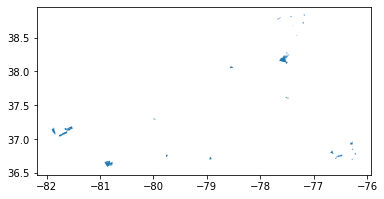

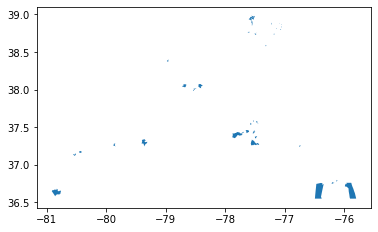

In [145]:
final[final['unique_id_1'].isin(set(final['unique_id_1']) - set(overlay_w_shp['unique_id_1']))].plot()
overlay_w_shp['geometry_x'][overlay_w_shp['unique_id_1'].isin(set(overlay_w_shp['unique_id_1']) - set(final['unique_id_1']))].plot()

- load into QGIS to isolate that point - here probs dont worry about
    - add as part of internal knowledge base
moving forward
- code to find intersection values 
    - we were not able to match to its own precicnt, but land here is split in VEST's 
    - eventually make fxn to show all alignments of what VEST did 

In [117]:
overlay_w_shp['unique_id_1'].value_counts()

121032    4
153411    2
520004    2
191702    2
685003    2
         ..
660103    1
107123    1
760307    1
550038    1
810021    1
Name: unique_id_1, Length: 2451, dtype: int64

In [118]:
overlay_w_shp.columns

Index(['STATEFP_1', 'COUNTYFP_1', 'CDFP', 'CDTYP', 'NAMELSAD_1', 'LSAD_1',
       'PARTFLG', 'CHNG_TYPE_1', 'EFF_DATE', 'NEW_CODE', 'RELTYPE1',
       'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5', 'REL_ENT1', 'REL_ENT2',
       'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1', 'JUSTIFY_1', 'CDSESSN',
       'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1', 'STATEFP_2', 'COUNTYFP_2',
       'VTDST_x', 'NAMELSAD_2', 'VTDI_x', 'LSAD_2', 'CHNG_TYPE_2',
       'ORIG_NAME_x', 'ORIG_CODE_x', 'RELATE_2', 'NAME_2', 'VINTAGE_2',
       'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC_x', 'unique_id', 'geometry_x',
       'STATEFP', 'COUNTYFP', 'VTDST_y', 'NAMELSAD', 'VTDI_y', 'LSAD',
       'CHNG_TYPE', 'ORIG_NAME_y', 'ORIG_CODE_y', 'RELATE', 'NAME', 'VINTAGE',
       'FUNCSTAT', 'JUSTIFY', 'MTFCC_y', 'geometry_y', 'unique_id_1'],
      dtype='object')

In [151]:
overlay_w_shp['geometry'] = overlay_w_shp['geometry_x']
#overlay_w_shp = overlay_w_shp.drop(['geometry_x', 'geometry_y'], axis = 1)

In [152]:
overlay_w_shp[['geometry','geometry_x', 'geometry_y']][overlay_w_shp['geometry_x'] == None]

,geometry,geometry_x,geometry_y
2455,None,None,"POLYGON Z ((-76.34623 36.74604 0.00000, -76.34..."
2456,None,None,"POLYGON Z ((-76.31892 36.94388 0.00000, -76.31..."
2457,None,None,"POLYGON Z ((-76.23719 36.91349 0.00000, -76.23..."
2458,None,None,"POLYGON Z ((-77.65092 38.16187 0.00000, -77.65..."
2459,None,None,"POLYGON Z ((-77.53805 38.20530 0.00000, -77.53..."
2460,None,None,"POLYGON Z ((-77.55923 38.23381 0.00000, -77.55..."
2461,None,None,"POLYGON Z ((-77.81360 38.53011 0.00000, -77.81..."
2462,None,None,"POLYGON Z ((-77.42483 38.94137 0.00000, -77.42..."
2463,None,None,"POLYGON Z ((-77.38414 38.98895 0.00000, -77.38..."
2464,None,None,"POLYGON Z ((-77.18824 38.83886 0.00000, -77.18..."


In [153]:
overlay_w_shp.loc[overlay_w_shp['geometry_x'] == None, 'geometry'] = overlay_w_shp.loc[overlay_w_shp['geometry_x'] == None, 'geometry_y']

In [154]:
overlay_w_shp[['geometry','geometry_x', 'geometry_y']][overlay_w_shp['geometry_x'] == None]

,geometry,geometry_x,geometry_y
2455,"POLYGON Z ((-76.34623 36.74604 0.00000, -76.34...",None,"POLYGON Z ((-76.34623 36.74604 0.00000, -76.34..."
2456,"POLYGON Z ((-76.31892 36.94388 0.00000, -76.31...",None,"POLYGON Z ((-76.31892 36.94388 0.00000, -76.31..."
2457,"POLYGON Z ((-76.23719 36.91349 0.00000, -76.23...",None,"POLYGON Z ((-76.23719 36.91349 0.00000, -76.23..."
2458,"POLYGON Z ((-77.65092 38.16187 0.00000, -77.65...",None,"POLYGON Z ((-77.65092 38.16187 0.00000, -77.65..."
2459,"POLYGON Z ((-77.53805 38.20530 0.00000, -77.53...",None,"POLYGON Z ((-77.53805 38.20530 0.00000, -77.53..."
2460,"POLYGON Z ((-77.55923 38.23381 0.00000, -77.55...",None,"POLYGON Z ((-77.55923 38.23381 0.00000, -77.55..."
2461,"POLYGON Z ((-77.81360 38.53011 0.00000, -77.81...",None,"POLYGON Z ((-77.81360 38.53011 0.00000, -77.81..."
2462,"POLYGON Z ((-77.42483 38.94137 0.00000, -77.42...",None,"POLYGON Z ((-77.42483 38.94137 0.00000, -77.42..."
2463,"POLYGON Z ((-77.38414 38.98895 0.00000, -77.38...",None,"POLYGON Z ((-77.38414 38.98895 0.00000, -77.38..."
2464,"POLYGON Z ((-77.18824 38.83886 0.00000, -77.18...",None,"POLYGON Z ((-77.18824 38.83886 0.00000, -77.18..."


In [166]:
overlay_w_shp.columns

Index(['unique_id_1', 'geometry', 'STATEFP_1', 'COUNTYFP_1', 'CDFP', 'CDTYP',
       'NAMELSAD_1', 'LSAD_1', 'PARTFLG', 'CHNG_TYPE_1', 'EFF_DATE',
       'NEW_CODE', 'RELTYPE1', 'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5',
       'REL_ENT1', 'REL_ENT2', 'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1',
       'JUSTIFY_1', 'CDSESSN', 'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1',
       'STATEFP_2', 'COUNTYFP_2', 'VTDST_x', 'NAMELSAD_2', 'VTDI_x', 'LSAD_2',
       'CHNG_TYPE_2', 'ORIG_NAME_x', 'ORIG_CODE_x', 'RELATE_2', 'NAME_2',
       'VINTAGE_2', 'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC_x', 'unique_id',
       'geometry_x', 'STATEFP', 'COUNTYFP', 'VTDST_y', 'NAMELSAD', 'VTDI_y',
       'LSAD', 'CHNG_TYPE', 'ORIG_NAME_y', 'ORIG_CODE_y', 'RELATE', 'NAME',
       'VINTAGE', 'FUNCSTAT', 'JUSTIFY', 'MTFCC_y', 'geometry_y'],
      dtype='object')

In [155]:
overlay_w_shp = overlay_w_shp.dissolve(by = 'unique_id_1', as_index = False)

In [156]:
overlay_w_shp.unique_id_1.nunique()

2451

In [184]:
len(set(df_with_absentee_reallocated.unique_id_1) -set(overlay_w_shp.unique_id_1))

45

In [185]:
len(set(overlay_w_shp.unique_id_1) - set(df_with_absentee_reallocated.unique_id_1))

41

In [188]:
len(final_double_list)

21

In [189]:
final.shape

(2456, 13)

**Questions for Peter: 5/11/21**
- do you think I can expect any better of a match rate? - no
- the one spot bottom left, any way to identify which precinct that is and match it up?
- inner or outer join for recreation of election results and shapefile?
    - outer to see what is joined and not joined
    - print merge.value_counts(
    - allows to show how many only have 1 vs other
- Anything else noteworthy before all laid out in report?
- Should I use the new template? 


- I think I still need to dissolve ? Why didnt it work?

**NEXT 5/11/21**
- clean up code for US president (here) and US house
- modify special elections scripts to validate based on joined file
- write report (+ readme?)
- upload to AWS
- send to Peter for review

# Join shapefile and election results

In [158]:
shp_df_merge = pd.merge(overlay_w_shp, df_with_absentee_reallocated, on = 'unique_id_1', how = 'inner', suffixes = ['_x', '_y'])
shp_df_gdf = gpd.GeoDataFrame(shp_df_merge, geometry = 'geometry')

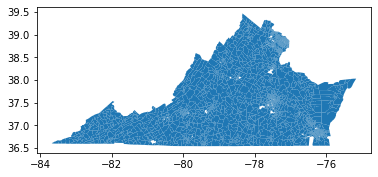

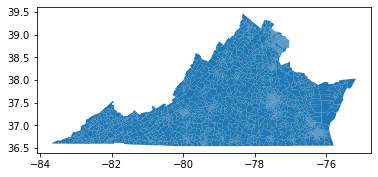

In [191]:
shp_df_gdf.plot()
final.plot()

In [163]:
shp_df_gdf.columns

Index(['unique_id_1', 'geometry', 'STATEFP_1', 'COUNTYFP_1', 'CDFP', 'CDTYP',
       'NAMELSAD_1', 'LSAD_1', 'PARTFLG', 'CHNG_TYPE_1', 'EFF_DATE',
       'NEW_CODE', 'RELTYPE1', 'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5',
       'REL_ENT1', 'REL_ENT2', 'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1',
       'JUSTIFY_1', 'CDSESSN', 'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1',
       'STATEFP_2', 'COUNTYFP_2', 'VTDST_x', 'NAMELSAD_2', 'VTDI_x', 'LSAD_2',
       'CHNG_TYPE_2', 'ORIG_NAME_x', 'ORIG_CODE_x', 'RELATE_2', 'NAME_2',
       'VINTAGE_2', 'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC_x', 'unique_id_x',
       'geometry_x', 'STATEFP', 'COUNTYFP_x', 'VTDST_y', 'NAMELSAD', 'VTDI_y',
       'LSAD', 'CHNG_TYPE', 'ORIG_NAME_y', 'ORIG_CODE_y', 'RELATE', 'NAME',
       'VINTAGE', 'FUNCSTAT', 'JUSTIFY', 'MTFCC_y', 'geometry_y', 'Pct',
       'LOCALITY', 'G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH', 'G16PREIMCM',
       'G16PREGSTE', 'G16PREOWRI', 'COUNTYFP_y', 'countyfp_cd', 'vtdst',
       'unique_id_y'],
  

In [167]:
shp_df_gdf = shp_df_gdf.drop(['geometry_x', 'geometry_y'], axis = 1)

# Validation

## Shapefile

In [172]:
shp_final_merge = pd.merge(shp_df_gdf, final, on = 'unique_id_1', how = 'inner', suffixes = ['_x', '_y'])
overlay_w_shp['geometry'].geom_almost_equals(final['geometry'], decimal = 0)

/Users/lilyfalk/anaconda3/lib/python3.8/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0        True
1        True
2        True
3        True
4        True
        ...  
2451    False
2452    False
2453    False
2454    False
2455    False
Length: 2456, dtype: bool

In [173]:
shp_final_merge.columns

Index(['unique_id_1', 'geometry_x', 'STATEFP_1', 'COUNTYFP_1', 'CDFP', 'CDTYP',
       'NAMELSAD_1', 'LSAD_1', 'PARTFLG', 'CHNG_TYPE_1', 'EFF_DATE',
       'NEW_CODE', 'RELTYPE1', 'RELTYPE2', 'RELTYPE3', 'RELTYPE4', 'RELTYPE5',
       'REL_ENT1', 'REL_ENT2', 'REL_ENT3', 'REL_ENT4', 'REL_ENT5', 'RELATE_1',
       'JUSTIFY_1', 'CDSESSN', 'NAME_1', 'VINTAGE_1', 'FUNCSTAT_1',
       'STATEFP_2', 'COUNTYFP_2', 'VTDST_x', 'NAMELSAD_2', 'VTDI_x', 'LSAD_2',
       'CHNG_TYPE_2', 'ORIG_NAME_x', 'ORIG_CODE_x', 'RELATE_2', 'NAME_2',
       'VINTAGE_2', 'FUNCSTAT_2', 'JUSTIFY_2', 'MTFCC_x', 'unique_id_x',
       'STATEFP', 'COUNTYFP_x', 'VTDST_y', 'NAMELSAD', 'VTDI_y', 'LSAD',
       'CHNG_TYPE', 'ORIG_NAME_y', 'ORIG_CODE_y', 'RELATE', 'NAME', 'VINTAGE',
       'FUNCSTAT', 'JUSTIFY', 'MTFCC_y', 'Pct', 'LOCALITY_x', 'G16PREDCLI_x',
       'G16PRERTRU_x', 'G16PRELJOH_x', 'G16PREIMCM_x', 'G16PREGSTE_x',
       'G16PREOWRI_x', 'COUNTYFP_y', 'countyfp_cd', 'vtdst', 'unique_id_y',
       'COUNTYFP', 'LO

In [193]:
shp_final_merge.shape

(2410, 83)

In [196]:
final[final['unique_id'].isin(final_double_list)]

,COUNTYFP,LOCALITY,VTDST,PRECINCT,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREIMCM,G16PREGSTE,G16PREOWRI,geometry,unique_id,unique_id_1
1766,650,Hampton City,000215,TYLER (CD 3),542,93,11,3,2,3,"POLYGON Z ((-76.36283 37.05127 0.00000, -76.36...",650215,650215(CD 3)
2174,550,Chesapeake City,000020,E W Chittum (CD 4),892,1176,61,16,10,11,"POLYGON Z ((-76.43452 36.81465 0.00000, -76.43...",550020,550020(CD 4)
2175,550,Chesapeake City,000020,E W Chittum (CD 3),4,10,1,0,0,0,"MULTIPOLYGON Z (((-76.41226 36.80753 0.00000, ...",550020,550020(CD 3)
2176,059,Fairfax County,000513,Saint Albans (CD 8),441,206,15,12,7,15,"POLYGON Z ((-77.17195 38.83980 0.00000, -77.17...",059513,059513(CD 8)
2177,059,Fairfax County,000513,Saint Albans (CD 11),880,356,31,25,4,21,"MULTIPOLYGON Z (((-77.17507 38.82548 0.00000, ...",059513,059513(CD 11)
2180,650,Hampton City,000215,TYLER (CD 2),23,13,1,0,0,1,"POLYGON Z ((-76.36144 37.05458 0.00000, -76.35...",650215,650215(CD 2)
2198,710,Norfolk City,000101,Granby (CD 3),1450,664,99,26,24,16,"POLYGON Z ((-76.28824 36.91625 0.00000, -76.28...",710101,710101(CD 3)
2199,710,Norfolk City,000104,Titustown (CD 3),449,17,12,8,8,4,"POLYGON Z ((-76.28979 36.91112 0.00000, -76.28...",710104,710104(CD 3)
2201,153,Prince William County,000210,Penn (CD 1),797,1041,65,33,10,17,"POLYGON Z ((-77.42210 38.70395 0.00000, -77.42...",153210,153210(CD 1)
2202,153,Prince William County,000210,Penn (CD 11),99,58,6,1,0,0,"POLYGON Z ((-77.38312 38.67447 0.00000, -77.38...",153210,153210(CD 11)


In [174]:
shp_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_x')
final_shapes = gpd.GeoDataFrame(shp_final_merge, geometry = 'geometry_y')
vals = shp_shapes.geom_almost_equals(final_shapes, decimal = 0)
print(vals.value_counts())

True     1777
False     633
dtype: int64


059    50
107    38
153    36
550    29
700    24
       ..
630     1
730     1
007     1
049     1
680     1
Name: unique_id_1, Length: 92, dtype: int64


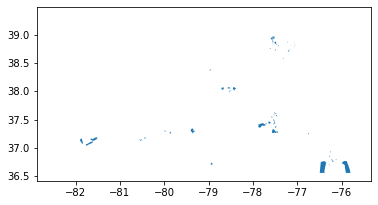

In [175]:
print(shp_final_merge[~vals]['unique_id_1'].str[0:3].value_counts())
diff_precincts = gpd.GeoDataFrame(shp_final_merge[~vals], geometry = 'geometry_x', crs = proj)

shp_difference = gpd.overlay(shp_shapes, final_shapes, how = 'symmetric_difference')
shp_difference.plot()

     unique_id_1                                         geometry_x STATEFP_1  \
9         001601  POLYGON Z ((-75.96825 37.77584 0.00000, -75.96...        51   
11        001701  POLYGON Z ((-76.17569 37.67163 0.00000, -76.19...        51   
12        001801  POLYGON Z ((-76.16813 37.64482 0.00000, -76.17...        51   
13        001802  POLYGON Z ((-75.79075 37.67432 0.00000, -75.79...        51   
14        001803  POLYGON Z ((-75.59744 37.45099 0.00000, -75.62...        51   
...          ...                                                ...       ...   
2404      840101  POLYGON Z ((-78.20050 39.18016 0.00000, -78.20...        51   
2405      840102  POLYGON Z ((-78.19729 39.19091 0.00000, -78.19...        51   
2406      840201  POLYGON Z ((-78.16398 39.19897 0.00000, -78.16...        51   
2407      840301  POLYGON Z ((-78.14255 39.18011 0.00000, -78.14...        51   
2409      840402  POLYGON Z ((-78.19056 39.14098 0.00000, -78.19...        51   

     COUNTYFP_1 CDFP CDTYP 

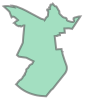

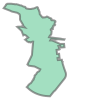

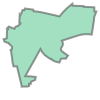

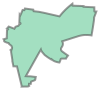

In [176]:
#Show a random difference
test = shp_final_merge[~vals].sample(axis = 0, n=1).index[0]
print(shp_final_merge[~vals])
display(shp_final_merge.iloc[test]['geometry_x'])
display(shp_final_merge.iloc[test]['geometry_y'])

test = shp_final_merge[~vals].sample(axis = 0).index[0]
display(shp_final_merge.iloc[test]['geometry_x'])
display(shp_final_merge.iloc[test]['geometry_y'])

## Election result comparison

In [177]:
final.columns

Index(['COUNTYFP', 'LOCALITY', 'VTDST', 'PRECINCT', 'G16PREDCLI', 'G16PRERTRU',
       'G16PRELJOH', 'G16PREIMCM', 'G16PREGSTE', 'G16PREOWRI', 'geometry',
       'unique_id', 'unique_id_1'],
      dtype='object')

In [178]:
column_list = ['G16PREDCLI', 'G16PRERTRU', 'G16PRELJOH', 'G16PREIMCM', 'G16PREGSTE', 'G16PREOWRI']

In [198]:
final_shp_merge = pd.merge(shp_df_gdf, final, on = 'unique_id_1', how = 'inner', suffixes = ('_x', '_y'))

In [199]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff != 0):
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]['unique_id_1'])
                if (diff>max_diff):
                    max_diff = diff
                    #add line to check percent from total vote difference is
                    perc_diff_from_vest = (diff/df.iloc[j][right_Data])*100
                    print("New max diff is: ", str(max_diff))
                    print('% difference from VEST total is: ', str(perc_diff_from_vest))
                    print(df.iloc[j]['unique_id_1'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]['unique_id_1'])
        else:
            matching_rows +=1
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
        #add line for % of total vote that difference is
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 5")
    diff_list.sort()

In [200]:
validater_row(final_shp_merge, column_list)

New max diff is:  1.0
% difference from VEST total is:  0.199203187250996
001101
New max diff is:  2.0
% difference from VEST total is:  0.29069767441860467
029401
There are  2410  total rows
1427  of these rows have election result differences
983  of these rows are the same

The max difference between any one shared column in a row is:  2.0
The average difference is:  1.0009886307464162
There are  0 precinct results with a difference greater than 5


In [201]:
final_df_merge = pd.merge(df_with_absentee_reallocated, final, on = 'unique_id_1', how = 'inner', suffixes = ('_x', '_y'))

In [202]:
validater_row(final_df_merge, column_list)

New max diff is:  1.0
% difference from VEST total is:  0.199203187250996
001101
New max diff is:  2.0
% difference from VEST total is:  0.29069767441860467
029401
There are  2455  total rows
1444  of these rows have election result differences
1011  of these rows are the same

The max difference between any one shared column in a row is:  2.0
The average difference is:  1.0009765625
There are  0 precinct results with a difference greater than 5
